
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining S&P 500 Sectors.  Construct portfolios from the S&P 500 Sector ETFs and examine the results of different weighting schemes.  In particular, we can select the best performing sectors over a given period.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['etf-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,SPY,S&P 500 ETF,US Stocks:Large Cap,142.43,38.05,20.83,14.02,14.69,12.63,5.63,18.36,20.83,1.13
1,DIA,DJIA ETF,US Stocks:Large Cap,177.77,35.69,11.59,9.93,14.13,16.58,6.23,18.58,11.59,0.62
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,112.58,34.73,51.54,26.96,23.19,15.91,9.32,20.27,51.54,2.54
3,VTI,Vanguard Total Stock Market Index ETF,US Stocks:Total Stock Market,180.83,51.07,22.85,14.25,14.85,12.60,5.42,19.19,22.85,1.19
4,IWM,Russell 2000 ETF,US Stocks:Small Cap,579.73,133.67,18.67,8.72,11.59,22.58,9.12,24.92,18.67,0.75
5,MDY,S&P 400 Midcap ETF,US Stocks:Mid Cap,353.85,98.98,13.77,7.38,10.95,20.53,9.17,23.10,13.77,0.60
6,IWD,Russell 1000 Value ETF,US Stocks:Value,313.58,62.29,5.15,5.97,9.26,20.97,6.66,19.51,5.15,0.26
7,IWF,Russell 1000 Growth ETF,US Stocks,74.03,32.59,39.54,22.28,20.00,13.55,8.00,19.44,39.54,2.03
8,RSP,S&P 500 Equal Weight ETF,US Stocks,341.40,71.30,15.24,10.23,12.26,22.28,7.37,21.22,15.24,0.72
9,SLY,S&P 600 Small Cap ETF,US Stocks:Small Cap,757.76,122.21,11.77,6.57,10.93,29.18,11.14,25.41,11.77,0.46


In [6]:
# Sector Ranking
sector_rank = bb.rank(df, rank_by='Sharpe Ratio')
sector_rank = sector_rank[sector_rank['Description'].str.contains('Sector ETF')]
#sector_rank = sector_rank.loc[(sector_rank['3 mo'] > 0) & sector_rank['1 Yr'] > 0]
#sector_rank = rank_filtered.head(10)
sector_rank

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
16,XLK,S&P500 Technology Sector ETF,US Stocks:Technology,132.08,30.79,47.17,28.10,25.61,15.84,8.17,20.89,47.17,2.26
21,XLY,S&P500 Consumer Discretionary Sector ETF,US Stocks:Consumer Discretionary,82.69,34.12,32.51,18.89,16.29,12.69,5.56,21.99,32.51,1.48
12,XLB,S&P500 Materials Sector ETF,US Stocks:Materials,218.76,56.87,23.38,8.58,12.06,21.29,9.88,20.88,23.38,1.12
20,XLV,S&P500 Healthcare Sector ETF,US Stocks:Healthcare,36.49,30.56,15.52,13.07,11.84,11.24,6.59,16.45,15.52,0.94
17,XLP,S&P500 Consumer Staples Sector ETF,US Stocks:Consumer Staples,82.61,16.10,11.36,9.03,9.42,12.40,5.88,13.98,11.36,0.81
15,XLI,S&P500 Industrials Sector ETF,US Stocks:Industrials,305.30,75.22,13.68,8.51,12.96,20.39,6.10,23.20,13.68,0.59
19,XLU,S&P500 Utilities Sector ETF,US Stocks:Utilities,-21.77,26.36,1.91,7.17,12.01,18.05,11.31,13.69,1.91,0.14
18,XLRE,S&P500 Real Estate Sector ETF,US Stocks:Real Estate,74.36,15.19,0.08,7.64,8.16,17.05,7.59,16.31,0.08,0.00
14,XLF,S&P500 Financials Sector ETF,US Stocks:Financials,628.52,76.25,-0.79,3.33,16.29,34.67,9.32,23.25,-0.79,-18.37
13,XLE,S&P500 Energy Sector ETF,US Stocks:Energy,4428.41,96.76,-24.11,-12.07,-5.04,70.74,23.65,39.34,-24.11,-948.49


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# S&P 500 Sectors - top 4
top_sectors_portfolio = {
    'Title': 'Top S&P500 Sectors Portfolio'
}
top_sectors = list(sector_rank['Investment Option'])[:4]
top_sectors_portfolio.update(dict.fromkeys(top_sectors, 1/len(top_sectors)))

# S&P 500 Sectors - all
all_sectors_portfolio = {
    'Title': 'All S&P500 Sectors Portfolio'
}
all_sectors = list(sector_rank['Investment Option'])
all_sectors_portfolio.update(dict.fromkeys(all_sectors, 1/len(all_sectors)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = all_sectors_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,XLK,XLY,XLB,XLV,XLP,XLI,XLU,XLRE,XLF,XLE,All S&P500 Sectors Portfolio
Annual Returns,47.17,32.51,23.38,15.52,11.36,13.68,1.91,0.08,-0.79,-24.11,12.07
Std Dev,20.89,21.99,20.88,16.45,13.98,23.20,13.69,16.31,23.25,39.34,19.14
Sharpe Ratio,2.26,1.48,1.12,0.94,0.81,0.59,0.14,0.00,-18.37,-948.49,0.63
Weight,0.10,0.14,0.08,0.12,0.14,0.13,0.07,0.10,0.09,0.03,1.00
Worst Typical Down Year,5.39,-11.47,-18.38,-17.38,-16.60,-32.72,-25.47,-32.54,-47.29,-102.79,-26.20
Black Swan,-15.50,-33.46,-39.26,-33.83,-30.58,-55.92,-39.16,-48.85,-70.54,-142.13,-45.34


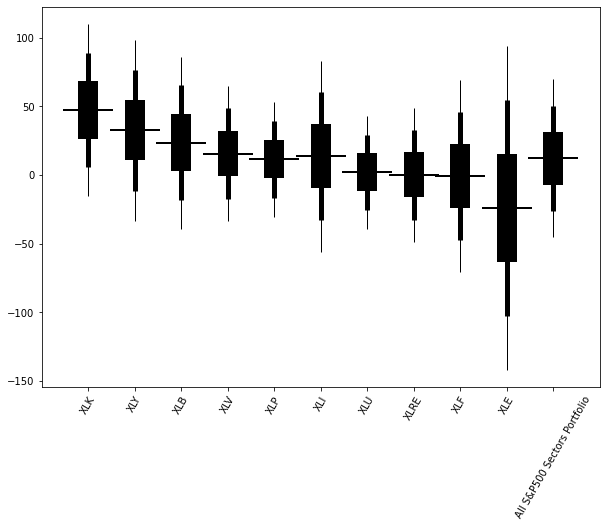

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

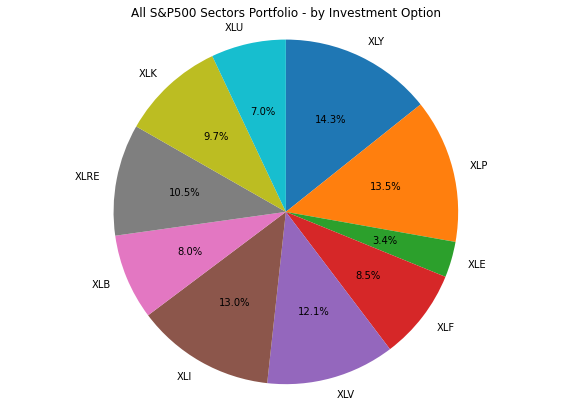

XLY    0.08
XLP    0.03
XLE    0.09
XLF    0.13
XLV    0.10
XLI    0.14
XLB    0.10
XLRE   0.07
XLK    0.12
XLU    0.14



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

All S&P500 Sectors Portfolio Weights:
    XLK                            0.0972
    XLY                            0.1429
    XLB                            0.0804
    XLV                            0.1205
    XLP                            0.1351
    XLI                            0.1302
    XLU                            0.0702
    XLRE                           0.1047
    XLF                            0.0852
    XLE                            0.0336


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...............

All S&P500 Sectors Portfolio Metrics:         
    max_sharpe_ratio                      1.52
    annual_return                        29.40
    std_dev                              19.31
    worst typical down year              -9.22
    black_swan                          -28.54


All S&P500 Sectors Portfolio Weights:
    XLK                            0.3400
    XLY                            0.2900
    XLB                            0.0900
    XLV                            0.1300
    XLP                            0.0600
    XLI                            0.0000
    XLU                            0.0500
    XLRE                           0.0000
    XLF                            0.0000
    XLE                            0.0400



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).